In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

In [2]:
import pandas as pd
df = pd.read_csv("D:\\Test\\rear_axle_failure_encoded_features_Up.csv")

In [3]:
df.head(5)

,Cumulative_Damage_Index,Thermal_Stress_Index,Temperature_Rise(°C),Shock_Severity_Index,Vibration(mm/s),Lubrication_Efficiency,Noise_Level(dB),Pinion_Teeth,Ambient_Temp(°C),Contact_Ratio,...,Aging_Factor,Road_Type_Off-road,Road_Type_Rough,Dust_Level_Low,Dust_Level_Medium,Rain_Exposure_Low,Rain_Exposure_Medium,Material_Grade_Low,Material_Grade_Medium,Failure
0,0.416235,0.552705,24.209911,0.501894,2.955721,0.891967,72.177925,8,42.398120,1.436095,...,0.472364,0,0,0,0,0,1,0,0,0
1,0.243500,0.455223,34.675042,0.207993,5.230683,0.698210,64.852989,8,34.188873,1.563832,...,0.442274,0,1,1,0,0,1,1,0,0
2,0.584895,1.032863,52.336880,0.592965,10.331324,0.358622,90.326981,9,36.940447,1.326842,...,0.769608,0,0,0,0,0,0,1,0,1
3,0.804740,0.917099,47.698274,0.826651,12.567856,0.407613,89.330777,9,38.679209,1.106061,...,0.726415,1,0,0,0,0,1,0,1,1
4,0.505242,0.554738,22.756353,0.453250,3.097957,0.946824,73.040361,10,26.860489,1.355646,...,0.544015,0,0,0,0,1,0,0,0,0


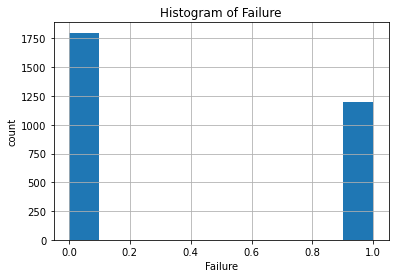

In [4]:
df['Failure'].hist()
plt.title('Histogram of Failure')
plt.ylabel('count')
plt.xlabel('Failure');
plt.show()

In [5]:
#Standardisation of Data
scaler=StandardScaler()
scaler.fit(df.drop('Failure',axis=1))
scaled_features=scaler.transform(df.drop('Failure',axis=1))
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Cumulative_Damage_Index,Thermal_Stress_Index,Temperature_Rise(°C),Shock_Severity_Index,Vibration(mm/s),Lubrication_Efficiency,Noise_Level(dB),Pinion_Teeth,Ambient_Temp(°C),Contact_Ratio,...,Case_Depth_mm,Aging_Factor,Road_Type_Off-road,Road_Type_Rough,Dust_Level_Low,Dust_Level_Medium,Rain_Exposure_Low,Rain_Exposure_Medium,Material_Grade_Low,Material_Grade_Medium
0,-0.330593,-0.272107,-0.804425,-0.189739,-1.219725,1.160329,-0.705876,-1.209971,1.490733,-0.010075,...,-0.019350,-0.399716,-0.614337,-0.663499,-0.763072,-0.669236,-0.772945,1.470110,-0.684944,-0.662978
1,-0.984607,-0.713998,0.143668,-1.688027,-0.646350,0.275668,-1.378018,-1.209971,0.313487,0.572215,...,1.944183,-0.536305,-0.614337,1.507162,1.310493,-0.669236,-0.772945,1.470110,1.459974,-0.662978
2,0.307995,1.904463,1.743750,0.274532,0.639203,-1.274834,0.959498,0.010578,0.708076,-0.508103,...,-0.360019,0.949600,-0.614337,-0.663499,-0.763072,-0.669236,-0.772945,-0.680221,1.459974,-0.662978
3,1.140383,1.379704,1.323513,1.465844,1.202892,-1.051149,0.868085,0.010578,0.957423,-1.514532,...,-0.769330,0.753528,1.627770,-0.663499,-0.763072,-0.669236,-0.772945,1.470110,-0.684944,1.508347
4,0.006411,-0.262893,-0.936111,-0.437722,-1.183876,1.410797,-0.626738,1.231127,-0.737439,-0.376803,...,0.743095,-0.074462,-0.614337,-0.663499,-0.763072,-0.669236,1.293753,-0.680221,-0.684944,-0.662978


In [6]:
# 30% Data is set aside for tesing
X_train,X_test,y_train,y_test=train_test_split(scaled_features,df['Failure'],test_size=0.30, random_state=3)

In [7]:
# --- Print shapes ---
print("✅ Shapes of train/test sets:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

✅ Shapes of train/test sets:
X_train: (2100, 33)
y_train: (2100,)
X_test: (900, 33)
y_test: (900,)


In [8]:
# trying different odd values of k for KNN and finding accuracy for them
knn = KNeighborsClassifier(n_neighbors=1)
accuracy_rate=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    accuracy_rate.append(score.mean())
print(accuracy_rate)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0, 0.5, 'Accuracy rate')

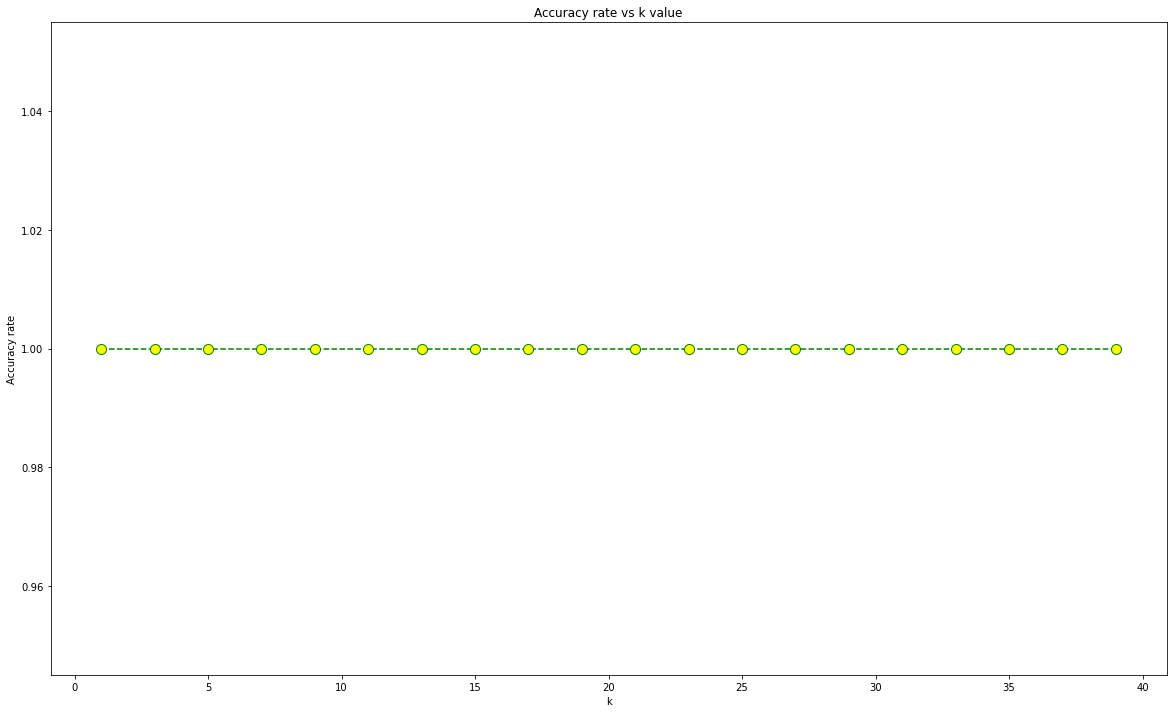

In [9]:
# plotting accuracy of KNN for every value of K. Accuracy is highest 

plt.figure(figsize=(20,12))
plt.plot(range(1,40,2),accuracy_rate,color='green',linestyle='dashed',marker='o',markerfacecolor='yellow',markersize=10)
plt.title('Accuracy rate vs k value')
plt.xlabel('k')
plt.ylabel('Accuracy rate')

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- Initialize KNN Classifier ---
KNNModel = KNeighborsClassifier(
    n_neighbors=15      # You can tune this parameter
)

# --- Fit the model on training data ---
KNN = KNNModel.fit(X_train, y_train)

# --- Predictions ---
KNN_Pred_train = KNN.predict(X_train)
KNN_Pred_test = KNN.predict(X_test)
KNN_Prob_test = KNN.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

print("*****KNN Results*****")
# --- Train Accuracy ---
train_accuracy = accuracy_score(y_train, KNN_Pred_train)
print("✅ Train Accuracy:", round(train_accuracy, 4))

# --- Test Accuracy ---
test_accuracy = accuracy_score(y_test, KNN_Pred_test)
print("✅ Test Accuracy:", round(test_accuracy, 4))

# --- Confusion Matrix ---
print("\n🧮 Confusion Matrix (Test Data):")
print(confusion_matrix(y_test, KNN_Pred_test))

# --- Classification Report ---
print("\n📊 Classification Report (Test Data):")
print(classification_report(y_test, KNN_Pred_test))

# --- Optional: 5-Fold Cross Validation on Training Data ---
cv_scores = cross_val_score(KNNModel, X_train, y_train, cv=5, scoring='accuracy')
print("🔹 5-Fold Cross Validation Accuracy Scores (Train):", cv_scores)
print("🔹 Average CV Accuracy:", round(cv_scores.mean(), 4))


*****KNN Results*****
✅ Train Accuracy: 1.0
✅ Test Accuracy: 1.0

🧮 Confusion Matrix (Test Data):
[[527   0]
 [  0 373]]

📊 Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       527
           1       1.00      1.00      1.00       373

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900

🔹 5-Fold Cross Validation Accuracy Scores (Train): [1. 1. 1. 1. 1.]
🔹 Average CV Accuracy: 1.0


In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- Initialize Gaussian Naive Bayes ---
GNBModel = GaussianNB()

# --- Fit the model on training data ---
GNB = GNBModel.fit(X_train, y_train)

# --- Predictions ---
GNB_Pred_train = GNB.predict(X_train)
GNB_Pred_test = GNB.predict(X_test)
GNB_Prob_test = GNB.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

print("*****GaussianNB Results*****")
# --- Train Accuracy ---
train_accuracy = accuracy_score(y_train, GNB_Pred_train)
print("✅ Train Accuracy:", round(train_accuracy, 4))

# --- Test Accuracy ---
test_accuracy = accuracy_score(y_test, GNB_Pred_test)
print("✅ Test Accuracy:", round(test_accuracy, 4))

# --- Confusion Matrix ---
print("\n🧮 Confusion Matrix (Test Data):")
print(confusion_matrix(y_test, GNB_Pred_test))

# --- Classification Report ---
print("\n📊 Classification Report (Test Data):")
print(classification_report(y_test, GNB_Pred_test))

# --- Optional: 5-Fold Cross Validation on Training Data ---
cv_scores = cross_val_score(GNBModel, X_train, y_train, cv=5, scoring='accuracy')
print("🔹 5-Fold Cross Validation Accuracy Scores (Train):", cv_scores)
print("🔹 Average CV Accuracy:", round(cv_scores.mean(), 4))

*****GaussianNB Results*****
✅ Train Accuracy: 1.0
✅ Test Accuracy: 1.0

🧮 Confusion Matrix (Test Data):
[[527   0]
 [  0 373]]

📊 Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       527
           1       1.00      1.00      1.00       373

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900

🔹 5-Fold Cross Validation Accuracy Scores (Train): [1. 1. 1. 1. 1.]
🔹 Average CV Accuracy: 1.0


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- Initialize Logistic Regression ---
LogModel = LogisticRegression(max_iter=1000, random_state=42)  # specify max_iter to ensure convergence

# --- Fit the model on training data ---
Log = LogModel.fit(X_train, y_train)

# --- Predictions ---
Log_Pred_train = Log.predict(X_train)
Log_Pred_test = Log.predict(X_test)
Log_Prob_test = Log.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

print("*****LogisticRegression Results*****")
# --- Train Accuracy ---
train_accuracy = accuracy_score(y_train, Log_Pred_train)
print("✅ Train Accuracy:", round(train_accuracy, 4))

# --- Test Accuracy ---
test_accuracy = accuracy_score(y_test, Log_Pred_test)
print("✅ Test Accuracy:", round(test_accuracy, 4))

# --- Confusion Matrix ---
print("\n🧮 Confusion Matrix (Test Data):")
print(confusion_matrix(y_test, Log_Pred_test))

# --- Classification Report ---
print("\n📊 Classification Report (Test Data):")
print(classification_report(y_test, Log_Pred_test))

# --- Optional: 5-Fold Cross Validation on Training Data ---
cv_scores = cross_val_score(LogModel, X_train, y_train, cv=5, scoring='accuracy')
print("🔹 5-Fold Cross Validation Accuracy Scores (Train):", cv_scores)
print("🔹 Average CV Accuracy:", round(cv_scores.mean(), 4))

*****LogisticRegression Results*****
✅ Train Accuracy: 1.0
✅ Test Accuracy: 1.0

🧮 Confusion Matrix (Test Data):
[[527   0]
 [  0 373]]

📊 Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       527
           1       1.00      1.00      1.00       373

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900

🔹 5-Fold Cross Validation Accuracy Scores (Train): [1. 1. 1. 1. 1.]
🔹 Average CV Accuracy: 1.0


In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- Initialize SVM Classifier ---
SVMModel = SVC()

# --- Fit the model on training data ---
SVM = SVMModel.fit(X_train, y_train)

# --- Predictions ---
SVM_Pred_train = SVM.predict(X_train)
SVM_Pred_test = SVM.predict(X_test)

print("*****SVM Results*****")
# --- Train Accuracy ---
train_accuracy = accuracy_score(y_train, SVM_Pred_train)
print("✅ Train Accuracy:", round(train_accuracy, 4))

# --- Test Accuracy ---
test_accuracy = accuracy_score(y_test, SVM_Pred_test)
print("✅ Test Accuracy:", round(test_accuracy, 4))

# --- Confusion Matrix ---
print("\n🧮 Confusion Matrix (Test Data):")
print(confusion_matrix(y_test, SVM_Pred_test))

# --- Classification Report ---
print("\n📊 Classification Report (Test Data):")
print(classification_report(y_test, SVM_Pred_test))

# --- Optional: 5-Fold Cross Validation on Training Data ---
cv_scores = cross_val_score(SVMModel, X_train, y_train, cv=5, scoring='accuracy')
print("🔹 5-Fold Cross Validation Accuracy Scores (Train):", cv_scores)
print("🔹 Average CV Accuracy:", round(cv_scores.mean(), 4))

*****SVM Results*****
✅ Train Accuracy: 1.0
✅ Test Accuracy: 1.0

🧮 Confusion Matrix (Test Data):
[[527   0]
 [  0 373]]

📊 Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       527
           1       1.00      1.00      1.00       373

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900

🔹 5-Fold Cross Validation Accuracy Scores (Train): [1. 1. 1. 1. 1.]
🔹 Average CV Accuracy: 1.0


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- Initialize Random Forest Classifier ---
RFModel = RandomForestClassifier(
    n_estimators=500,      # Number of trees
    max_depth=None,         # Maximum depth of trees (None = full depth)
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# --- Fit the model on training data ---
RF = RFModel.fit(X_train, y_train)

# --- Predictions ---
RF_Pred_train = RF.predict(X_train)
RF_Pred_test = RF.predict(X_test)
RF_Prob_test = RF.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC


print("*****RandomForestClassifier Results*****")
# --- Train Accuracy ---
train_accuracy = accuracy_score(y_train, RF_Pred_train)
print("✅ Train Accuracy:", round(train_accuracy, 4))

# --- Test Accuracy ---
test_accuracy = accuracy_score(y_test, RF_Pred_test)
print("✅ Test Accuracy:", round(test_accuracy, 4))

# --- Confusion Matrix ---
print("\n🧮 Confusion Matrix (Test Data):")
print(confusion_matrix(y_test, RF_Pred_test))

# --- Classification Report ---
print("\n📊 Classification Report (Test Data):")
print(classification_report(y_test, RF_Pred_test))

# --- Optional: 5-Fold Cross Validation on Training Data ---
cv_scores = cross_val_score(RFModel, X_train, y_train, cv=5, scoring='accuracy')
print("🔹 5-Fold Cross Validation Accuracy Scores (Train):", cv_scores)
print("🔹 Average CV Accuracy:", round(cv_scores.mean(), 4))

*****RandomForestClassifier Results*****
✅ Train Accuracy: 1.0
✅ Test Accuracy: 1.0

🧮 Confusion Matrix (Test Data):
[[527   0]
 [  0 373]]

📊 Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       527
           1       1.00      1.00      1.00       373

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900

🔹 5-Fold Cross Validation Accuracy Scores (Train): [1. 1. 1. 1. 1.]
🔹 Average CV Accuracy: 1.0


In [15]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- Initialize XGBoost Classifier ---
XGBModel = XGBClassifier(
    n_estimators=500,      # Number of trees
    max_depth=6,            # Maximum depth of each tree
    learning_rate=0.1,      # Step size shrinkage
    subsample=0.8,          # Fraction of samples per tree
    colsample_bytree=0.8,   # Fraction of features per tree
    use_label_encoder=False, # To suppress warning
    eval_metric='logloss',   # Evaluation metric for classification
    random_state=42
)

# --- Fit the model on training data ---
XGB = XGBModel.fit(X_train, y_train)

# --- Predictions ---
XGB_Pred_train = XGB.predict(X_train)
XGB_Pred_test = XGB.predict(X_test)
XGB_Prob_test = XGB.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC


print("*****XGB Results*****")
# --- Train Accuracy ---
train_accuracy = accuracy_score(y_train, XGB_Pred_train)
print("✅ Train Accuracy:", round(train_accuracy, 4))

# --- Test Accuracy ---
test_accuracy = accuracy_score(y_test, XGB_Pred_test)
print("✅ Test Accuracy:", round(test_accuracy, 4))

# --- Confusion Matrix ---
print("\n🧮 Confusion Matrix (Test Data):")
print(confusion_matrix(y_test, XGB_Pred_test))

# --- Classification Report ---
print("\n📊 Classification Report (Test Data):")
print(classification_report(y_test, XGB_Pred_test))

# --- Optional: 5-Fold Cross Validation on Training Data ---
cv_scores = cross_val_score(XGBModel, X_train, y_train, cv=5, scoring='accuracy')
print("🔹 5-Fold Cross Validation Accuracy Scores (Train):", cv_scores)
print("🔹 Average CV Accuracy:", round(cv_scores.mean(), 4))

*****XGB Results*****
✅ Train Accuracy: 1.0
✅ Test Accuracy: 1.0

🧮 Confusion Matrix (Test Data):
[[527   0]
 [  0 373]]

📊 Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       527
           1       1.00      1.00      1.00       373

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900

🔹 5-Fold Cross Validation Accuracy Scores (Train): [1. 1. 1. 1. 1.]
🔹 Average CV Accuracy: 1.0
